In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_3detect = pd.read_csv('ECA_3Detect - ECA_3Detect.csv')
data_backbone = pd.read_csv('ECA_Backbone - ECA_Backbone.csv')
data_neck = pd.read_csv('neck after c2f - ECA_4c2f.csv')


In [ ]:
last_row_values = {
    "Yolov8_ECA": eca_results.iloc[-1, 1:-3],
    "Yolov8_GAM": gam_results.iloc[-1, 1:-3],
    "Yolov8_ResBlock_CBAM": resblock_cbam_results.iloc[-1, 1:-3],
    "Yolov8_SA": sa_results.iloc[-1, 1:-3],
    "Yolov8m": yolov8m_results.iloc[-1, 1:-3],
    "MLCA": yolov8m_MLCA_results.iloc[-1, 1:-3],
    "Yolov8_ECA_BackBone": yolov8m_ECA_BackBone.iloc[-1, 1:-3]

}

In [ ]:
# Function to clean column names
def clean_column_names(df):
    df.columns = df.columns.str.strip()
    return df

# Clean column names for each DataFrame
eca_results = clean_column_names(eca_results)
gam_results = clean_column_names(gam_results)
resblock_cbam_results = clean_column_names(resblock_cbam_results)
sa_results = clean_column_names(sa_results)
yolov8m_results = clean_column_names(yolov8m_results)
yolov8m_MLCA_results = clean_column_names(yolov8m_MLCA_results)
yolov8m_ECA_BackBone = clean_column_names(yolov8m_ECA_BackBone)

# After cleaning, re-define your last_row_values dictionary
last_row_values = {
    "Yolov8_ECA": eca_results.iloc[-1, 1:-3],
    "Yolov8_GAM": gam_results.iloc[-1, 1:-3],
    "Yolov8_ResBlock_CBAM": resblock_cbam_results.iloc[-1, 1:-3],
    "Yolov8_SA": sa_results.iloc[-1, 1:-3],
    "Yolov8m": yolov8m_results.iloc[-1, 1:-3],
    "Yolov8_MLCA": yolov8m_MLCA_results.iloc[-1, 1:-3],
        "ECAB": yolov8m_ECA_BackBone.iloc[-1, 1:-3]

}

# Then create your DataFrame
all_metrics = set()
for data in last_row_values.values():
    all_metrics.update(data.index)

last_epoch_data = pd.DataFrame({
    metric: [df.get(metric, np.nan) for df in last_row_values.values()]
    for metric in all_metrics
}, index=last_row_values.keys())

# Print the DataFrame to verify
print(last_epoch_data)




                      val/cls_loss  train/box_loss  metrics/mAP50(B)  \
Yolov8_ECA                 0.56861          1.3798           0.62456   
Yolov8_GAM                 0.57860          1.4444           0.60410   
Yolov8_ResBlock_CBAM       0.57008          1.3770           0.61887   
Yolov8_SA                  0.56498          1.3680           0.61341   
Yolov8m                    0.56818          1.3722           0.61240   
Yolov8_MLCA                0.58028          1.1212           0.59187   
ECAB                       0.57652          1.1062           0.60174   

                      metrics/recall(B)  metrics/precision(B)  train/dfl_loss  \
Yolov8_ECA                      0.59790               0.71118          1.1722   
Yolov8_GAM                      0.64199               0.62176          1.1736   
Yolov8_ResBlock_CBAM            0.59483               0.67651          1.1705   
Yolov8_SA                       0.59232               0.70265          1.1702   
Yolov8m           

In [ ]:
last_epoch_data = pd.DataFrame({
    metric: [df[metric] for df in last_row_values.values()]
    for metric in last_row_values["Yolov8_ECA"].index
}, index=last_row_values.keys())

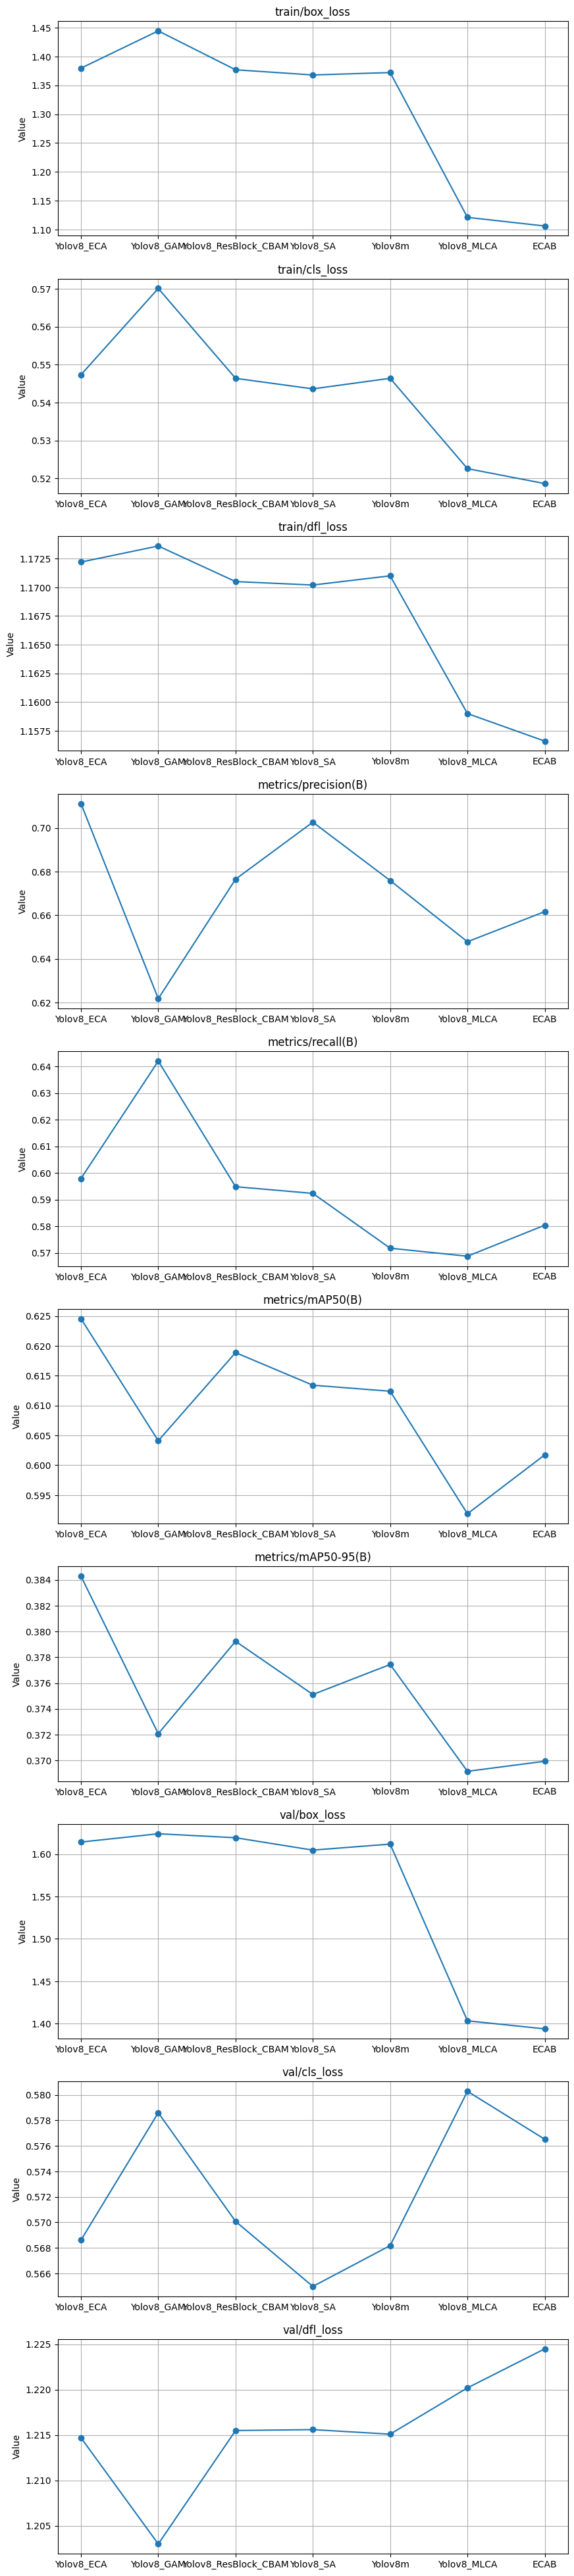

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Creating individual line plots for each metric for clearer comparison
num_metrics = len(last_epoch_data.columns)
fig, axes = plt.subplots(num_metrics, 1, figsize=(10, 5*num_metrics))

for i, metric in enumerate(last_epoch_data.columns):
    axes[i].plot(last_epoch_data.index, last_epoch_data[metric], marker='o', linestyle='-')
    axes[i].set_title(metric)
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

plt.figure(figsize=(10,6))
plt.tight_layout()
plt.show()


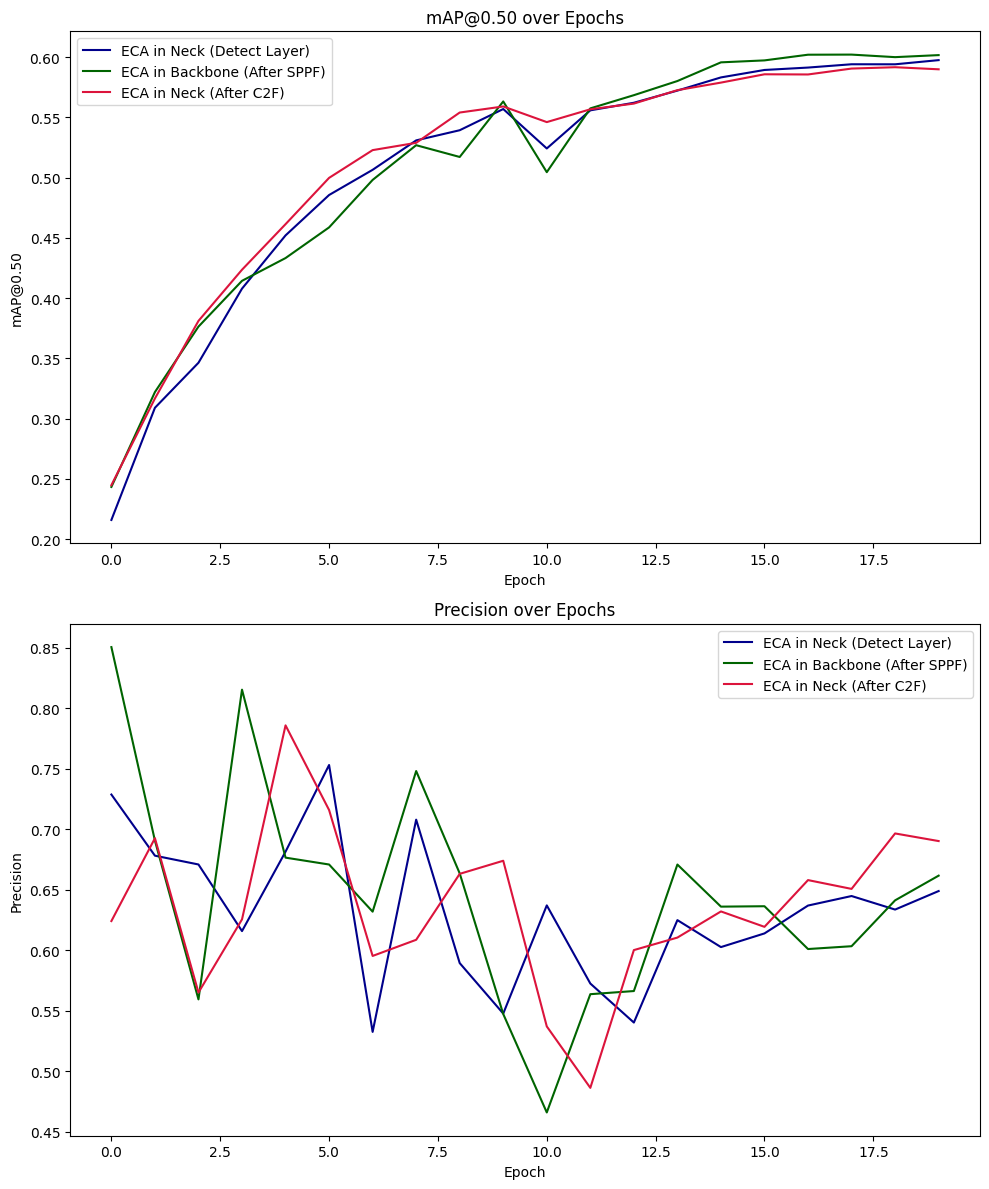

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_3detect = pd.read_csv('ECA_3Detect - ECA_3Detect.csv')
data_backbone = pd.read_csv('ECA_Backbone - ECA_Backbone.csv')
data_neck = pd.read_csv('neck after c2f - ECA_4c2f.csv')
# Define more distinctive colors for each configuration
colors = ['darkblue', 'darkgreen', 'crimson']

# Replot mAP@0.50 and Precision with distinctive colors
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# mAP@0.50 over epochs
axes[0].plot(data_3detect['epoch'], data_3detect['metrics/mAP50(B)'], label='ECA in Neck (Detect Layer)', color=colors[0])
axes[0].plot(data_backbone['epoch'], data_backbone['metrics/mAP50(B)'], label='ECA in Backbone (After SPPF)', color=colors[1])
axes[0].plot(data_neck['epoch'], data_neck['metrics/mAP50(B)'], label='ECA in Neck (After C2F)', color=colors[2])
axes[0].set_title('mAP@0.50 over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('mAP@0.50')
axes[0].legend()

# Precision over epochs
axes[1].plot(data_3detect['epoch'], data_3detect['metrics/precision(B)'], label='ECA in Neck (Detect Layer)', color=colors[0])
axes[1].plot(data_backbone['epoch'], data_backbone['metrics/precision(B)'], label='ECA in Backbone (After SPPF)', color=colors[1])
axes[1].plot(data_neck['epoch'], data_neck['metrics/precision(B)'], label='ECA in Neck (After C2F)', color=colors[2])
axes[1].set_title('Precision over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Precision')
axes[1].legend()

plt.tight_layout()
plt.show()
